In [331]:
#most positive, most negative, largest range, biggest reversal

# Load necessary libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [332]:
# File path to the Excel file
file_path = "data.xlsx"  # Replace with your actual file path

# Load the Excel file into a dictionary of DataFrames
try:
    # Read all sheets into a dictionary of DataFrames
    excel_data = pd.read_excel(os.path.join(os.getcwd(), "data", file_path), sheet_name=None)
    print("Excel file successfully loaded!")
    
    # Access specific sheets by name
    df_oct = excel_data.get("oct", pd.DataFrame())
    df_jan = excel_data.get("jan", pd.DataFrame())
    df_jan_summary = excel_data.get("jan_summary", pd.DataFrame())
    df_oct_summary = excel_data.get("oct_summary", pd.DataFrame())

except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

# Combine the two DataFrames
df_combined = pd.concat([df_jan_summary, df_oct_summary], ignore_index=True)

# Create a DataFrame for rows with NaN values
exemption_list = df_combined[df_combined.isnull().any(axis=1)]

# Drop rows with NaN values from the combined DataFrame
df_combined = df_combined.dropna()

Excel file successfully loaded!


In [333]:
exemption_list

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker
0,27,0,NaN,NaN,NaN,3.63,5.640000,5.6300,3.290000,4.6900,NaN,AMD
1,29,0,NaN,NaN,NaN,-3.80,-2.570000,-0.2700,4.000000,6.0600,NaN,AMD
2,32,0,NaN,NaN,NaN,-1.23,-0.146667,1.9400,4.093333,5.3800,NaN,AMD
3,35,0,NaN,NaN,NaN,2.91,5.520000,6.3100,4.560000,4.4200,NaN,AMD
4,36,0,NaN,NaN,NaN,2.67,5.440000,6.0100,4.880000,4.5600,NaN,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...
1648,101,0,4.3600,4.36,4.36,0.05,3.870000,4.6900,4.560000,3.4800,NaN,ORCL
1649,102,0,5.1250,5.35,4.90,0.50,2.122500,4.2825,4.350000,4.4425,NaN,ORCL
1650,103,0,4.9725,5.55,4.29,0.38,2.492500,4.6275,4.605000,4.0950,NaN,ORCL
1651,105,0,5.3900,5.39,5.39,0.60,1.480000,4.9000,4.910000,4.2600,NaN,ORCL


In [334]:
df_combined

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker
13,45,1,-5.150000,-5.15,-5.15,-0.799091,1.020909,2.888182,4.854545,6.222727,-0.360,AMD
14,46,1,1.780000,8.46,-4.90,0.423750,1.887500,3.858750,6.262500,7.085000,-0.320,AMD
15,47,2,7.423333,8.39,5.51,3.408333,5.505000,5.818333,7.820000,9.175000,0.835,AMD
17,49,1,8.175000,14.02,1.40,1.923043,3.685652,5.322727,7.403182,8.392727,-3.850,AMD
18,50,3,7.690000,10.83,1.81,1.322857,2.654286,4.132308,6.865385,8.374615,-2.270,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,91,2,4.358500,6.17,0.98,0.860000,1.760000,3.892222,4.470000,4.823889,1.255,ORCL
1640,93,1,4.819412,5.82,1.19,0.384706,2.291176,4.607647,4.800000,4.226471,2.070,ORCL
1641,94,2,4.163750,5.57,1.16,1.370000,2.764000,4.353333,4.876667,4.698667,0.985,ORCL
1643,96,1,4.475294,5.66,3.40,1.373529,3.077059,4.392941,4.950588,4.664118,0.420,ORCL


In [335]:
# Assuming 'df' is your DataFrame
columns_to_average = [
    "Reversal_Frequency",
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Group by 'anonymous signal' and calculate the mean for the specified columns
df_combined_avg = (
    df_combined.groupby("anonymous signal", as_index=False)[columns_to_average].mean()
)

# Optionally handle the 'Ticker' column, for example by concatenating unique tickers for each signal
df_combined_avg["Ticker"] = (
    df_combined.groupby("anonymous signal")["Ticker"]
    .apply(lambda x: ', '.join(x.unique()))  # Concatenate unique tickers
    .reset_index(drop=True)
)


In [336]:
# List of columns to apply clustering (excluding Ticker and any non-numeric columns)
columns_to_cluster = [
    "Reversal_Frequency",
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Define bin labels
cluster_labels = ["low", "med", "high"]

# Perform KMeans clustering for each column
for column in columns_to_cluster:
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df_combined_avg[f"{column}_Cluster"] = kmeans.fit_predict(df_combined_avg[[column]])
    
    # Sort clusters by their centroids
    centroids = kmeans.cluster_centers_.flatten()
    sorted_clusters = np.argsort(centroids)
    
    # Map clusters to bin labels
    cluster_to_bin = {sorted_clusters[i]: cluster_labels[i] for i in range(len(cluster_labels))}
    df_combined_avg[f"{column}_bin"] = df_combined_avg[f"{column}_Cluster"].map(cluster_to_bin)
    
    # Drop intermediate cluster column if not needed
    df_combined_avg.drop(columns=[f"{column}_Cluster"], inplace=True)

# View the updated DataFrame
df_combined_avg

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,...,Reversal_Frequency_bin,Average_Return_bin,Max_Positive_Return_bin,Max_Negative_Return_bin,Forward_1D_Return_Avg_bin,Forward_2D_Return_Avg_bin,Forward_3D_Return_Avg_bin,Forward_4D_Return_Avg_bin,Forward_5D_Return_Avg_bin,Two_Day_Reversal_Return_Avg_bin
0,8,2.000000,2.315000,2.500000,2.130000,3.355000,7.765000,11.515000,10.600000,16.155000,...,low,med,low,high,high,high,high,high,high,high
1,10,1.000000,-3.696667,-3.696667,-3.696667,0.926667,4.290000,5.176667,5.140000,6.783333,...,low,low,low,med,med,med,med,med,med,high
2,12,2.333333,-5.270556,-3.296667,-7.400000,0.277778,2.676111,4.296667,4.076667,6.242778,...,low,low,low,med,med,med,med,med,med,high
3,13,1.000000,-0.440000,-0.440000,-0.440000,2.360000,1.710000,3.060000,3.340000,3.000000,...,low,low,low,high,med,low,low,low,low,high
4,14,4.000000,-2.160000,-0.320000,-5.870000,1.720000,1.402500,2.667500,2.080000,2.240000,...,low,low,low,med,med,low,low,low,low,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,138,1.000000,15.150000,15.150000,15.150000,-3.420000,11.710000,7.750000,3.410000,3.100000,...,low,high,high,high,low,high,high,low,low,high
128,139,1.000000,12.580000,23.130000,2.030000,-2.940000,-1.840000,1.820000,-1.220000,2.030000,...,low,high,high,high,low,low,low,low,low,low
129,140,2.000000,-3.115000,0.200000,-6.430000,0.935000,0.720000,2.215000,2.050000,2.335000,...,low,low,low,med,med,low,low,low,low,high
130,144,1.000000,6.900000,6.900000,6.900000,3.940000,6.700000,9.030000,11.910000,15.380000,...,low,high,low,high,high,high,high,high,high,low


In [337]:
df_combined_avg

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,...,Reversal_Frequency_bin,Average_Return_bin,Max_Positive_Return_bin,Max_Negative_Return_bin,Forward_1D_Return_Avg_bin,Forward_2D_Return_Avg_bin,Forward_3D_Return_Avg_bin,Forward_4D_Return_Avg_bin,Forward_5D_Return_Avg_bin,Two_Day_Reversal_Return_Avg_bin
0,8,2.000000,2.315000,2.500000,2.130000,3.355000,7.765000,11.515000,10.600000,16.155000,...,low,med,low,high,high,high,high,high,high,high
1,10,1.000000,-3.696667,-3.696667,-3.696667,0.926667,4.290000,5.176667,5.140000,6.783333,...,low,low,low,med,med,med,med,med,med,high
2,12,2.333333,-5.270556,-3.296667,-7.400000,0.277778,2.676111,4.296667,4.076667,6.242778,...,low,low,low,med,med,med,med,med,med,high
3,13,1.000000,-0.440000,-0.440000,-0.440000,2.360000,1.710000,3.060000,3.340000,3.000000,...,low,low,low,high,med,low,low,low,low,high
4,14,4.000000,-2.160000,-0.320000,-5.870000,1.720000,1.402500,2.667500,2.080000,2.240000,...,low,low,low,med,med,low,low,low,low,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,138,1.000000,15.150000,15.150000,15.150000,-3.420000,11.710000,7.750000,3.410000,3.100000,...,low,high,high,high,low,high,high,low,low,high
128,139,1.000000,12.580000,23.130000,2.030000,-2.940000,-1.840000,1.820000,-1.220000,2.030000,...,low,high,high,high,low,low,low,low,low,low
129,140,2.000000,-3.115000,0.200000,-6.430000,0.935000,0.720000,2.215000,2.050000,2.335000,...,low,low,low,med,med,low,low,low,low,high
130,144,1.000000,6.900000,6.900000,6.900000,3.940000,6.700000,9.030000,11.910000,15.380000,...,low,high,low,high,high,high,high,high,high,low


In [338]:
df_combined_avg.nlargest(5, "Max_Positive_Return")

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,...,Reversal_Frequency_bin,Average_Return_bin,Max_Positive_Return_bin,Max_Negative_Return_bin,Forward_1D_Return_Avg_bin,Forward_2D_Return_Avg_bin,Forward_3D_Return_Avg_bin,Forward_4D_Return_Avg_bin,Forward_5D_Return_Avg_bin,Two_Day_Reversal_Return_Avg_bin
128,139,1.000,12.580000,23.13000,2.030,-2.940000,-1.840000,1.820000,-1.220000,2.030000,...,low,high,high,high,low,low,low,low,low,low
121,132,3.800,9.618000,20.75600,1.120,1.050667,3.130667,7.456000,10.446667,10.550000,...,low,high,high,high,med,med,high,high,high,high
111,122,14.625,7.223369,19.39750,-1.550,0.808286,2.278245,3.526481,4.718566,4.928072,...,low,high,high,high,med,med,med,med,med,high
116,127,8.375,7.701163,19.07250,-0.045,1.062939,2.111659,3.567334,4.962813,5.272169,...,low,high,high,high,med,med,med,med,med,high
114,125,10.250,6.388880,19.05125,-1.185,0.778111,2.198021,4.432905,4.934200,6.474352,...,low,high,high,high,med,med,med,med,med,high


In [339]:
df_combined_avg.nlargest(5, "Two_Day_Reversal_Return_Avg")

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,...,Reversal_Frequency_bin,Average_Return_bin,Max_Positive_Return_bin,Max_Negative_Return_bin,Forward_1D_Return_Avg_bin,Forward_2D_Return_Avg_bin,Forward_3D_Return_Avg_bin,Forward_4D_Return_Avg_bin,Forward_5D_Return_Avg_bin,Two_Day_Reversal_Return_Avg_bin
127,138,1.000,15.150000,15.15000,15.15000,-3.420000,11.710000,7.750000,3.410000,3.100000,...,low,high,high,high,low,high,high,low,low,high
131,145,1.000,5.830000,5.83000,5.83000,6.440000,8.580000,9.510000,9.030000,12.390000,...,low,high,low,high,high,high,high,high,high,high
117,128,7.125,8.107113,18.63375,1.29875,1.801455,2.637894,4.327151,5.124574,4.807955,...,low,high,high,high,med,med,med,med,med,high
4,14,4.000,-2.160000,-0.32000,-5.87000,1.720000,1.402500,2.667500,2.080000,2.240000,...,low,low,low,med,med,low,low,low,low,high
116,127,8.375,7.701163,19.07250,-0.04500,1.062939,2.111659,3.567334,4.962813,5.272169,...,low,high,high,high,med,med,med,med,med,high


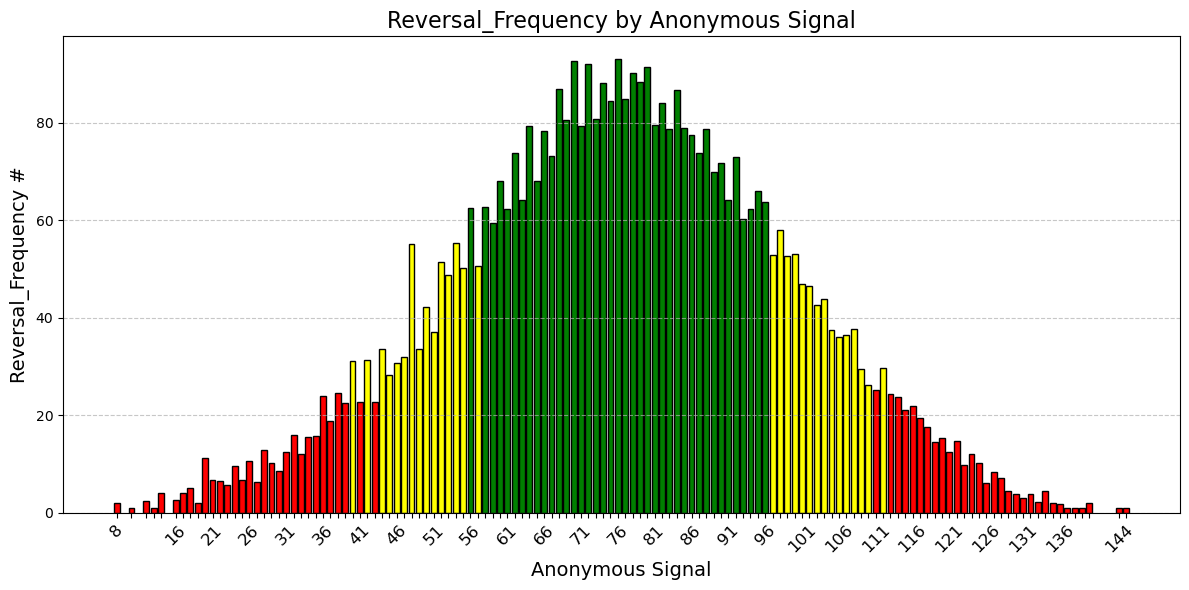

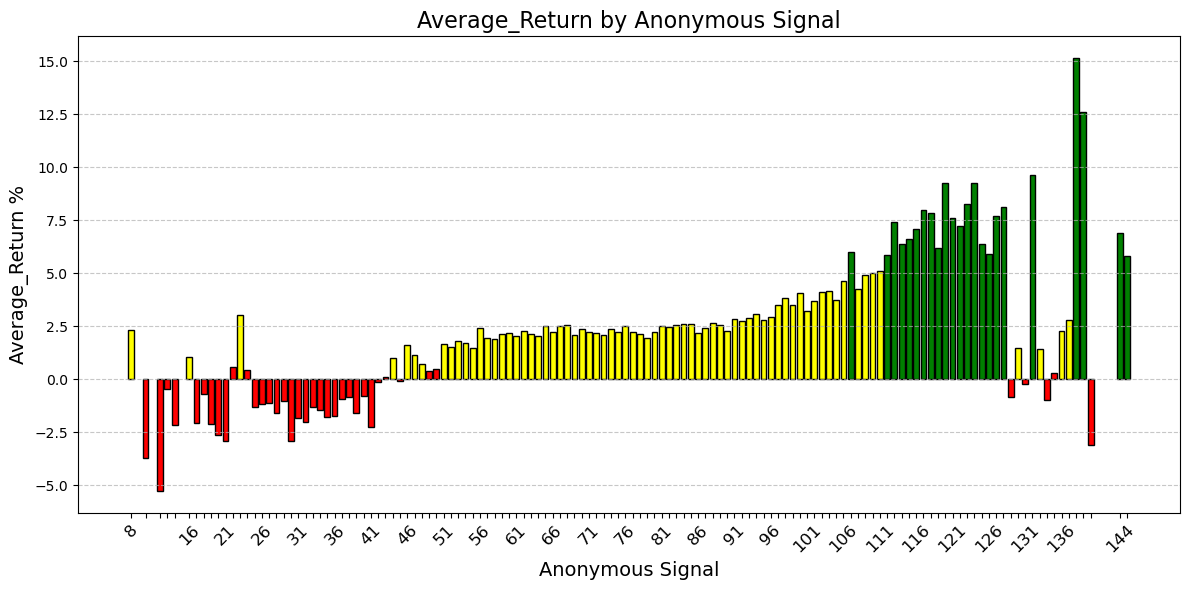

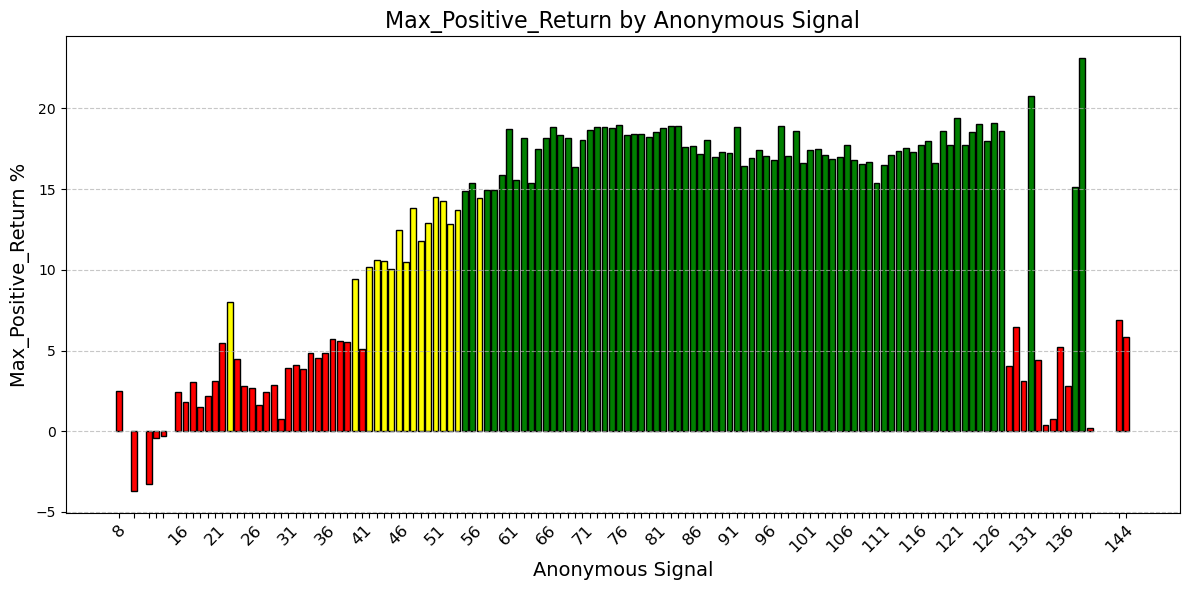

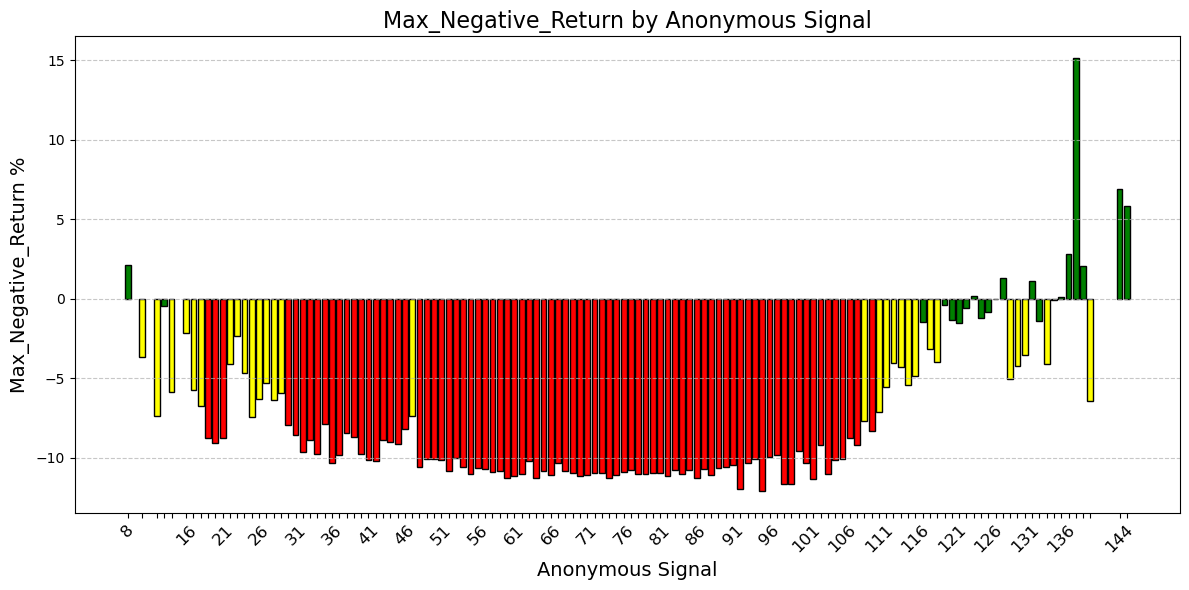

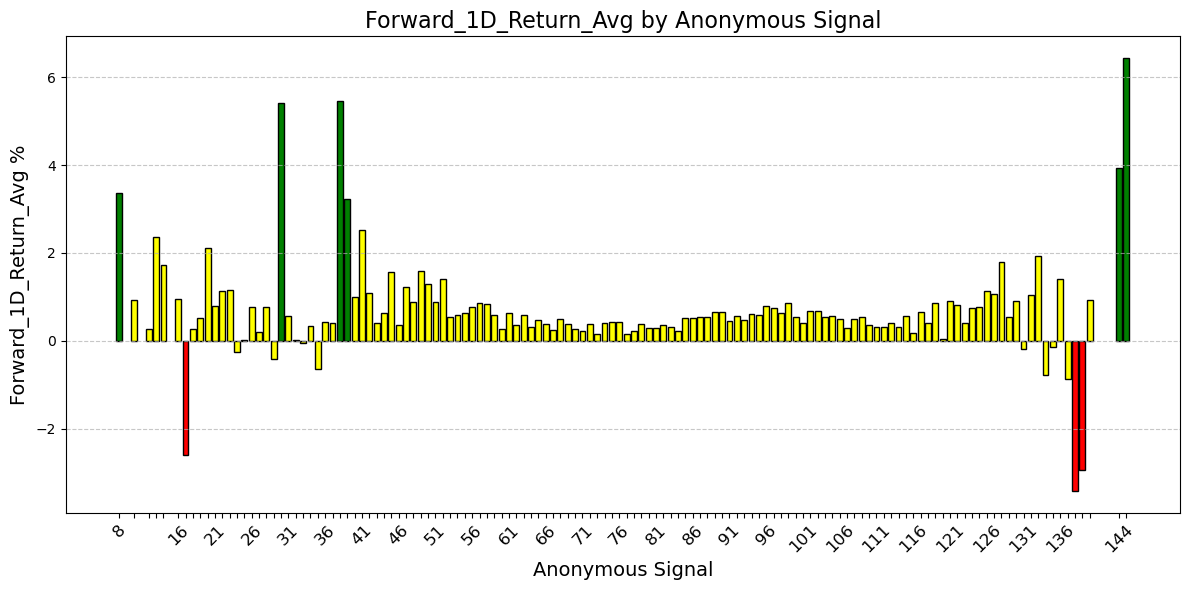

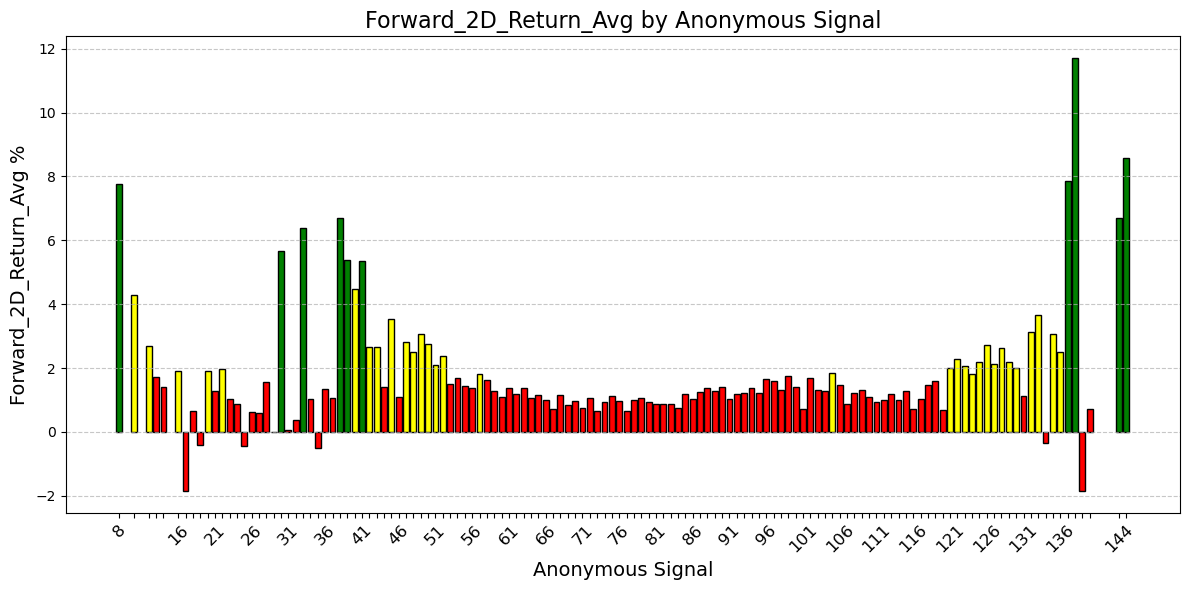

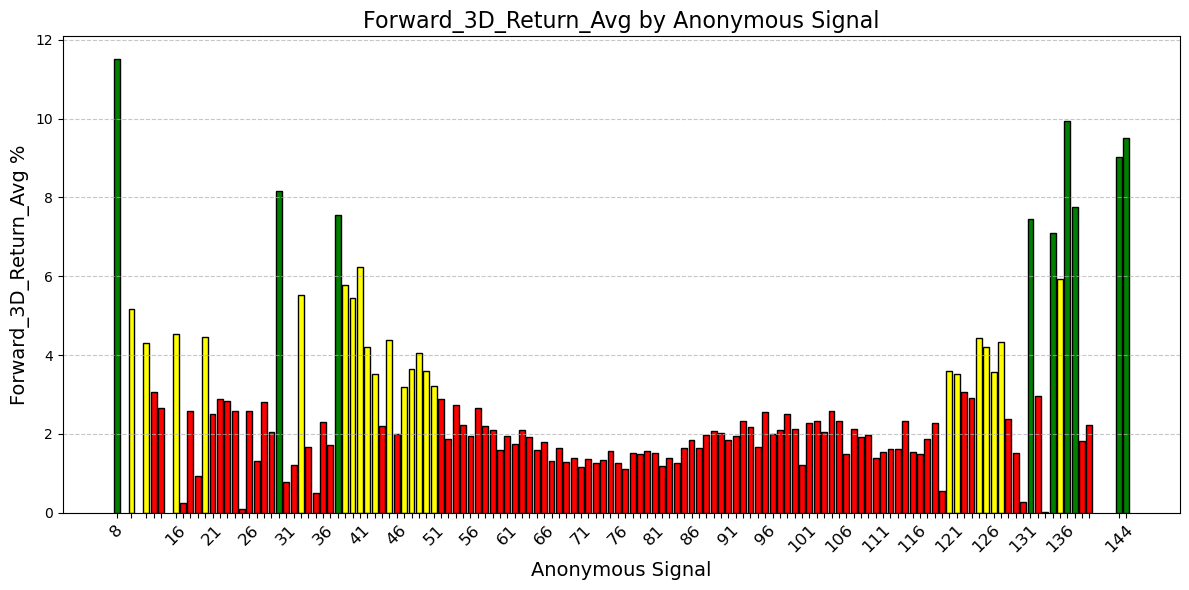

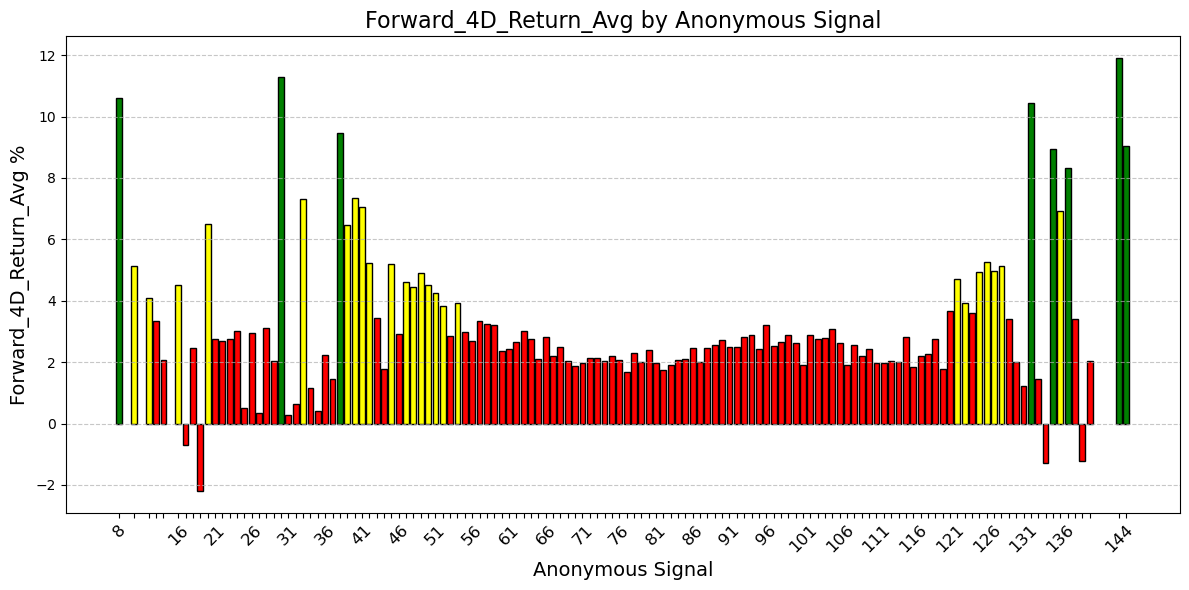

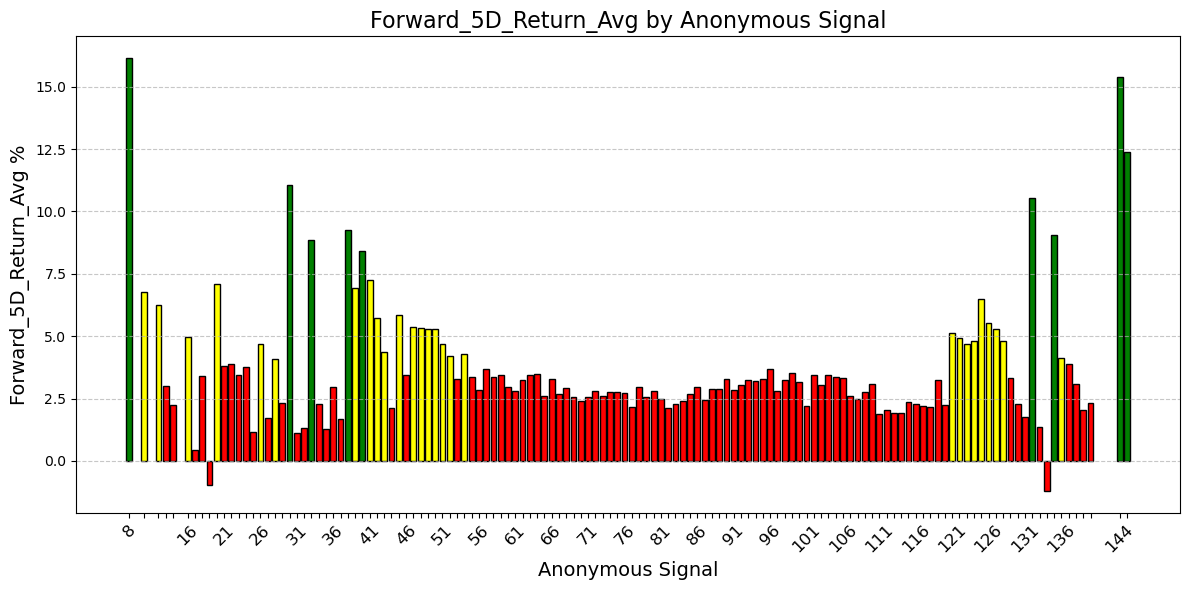

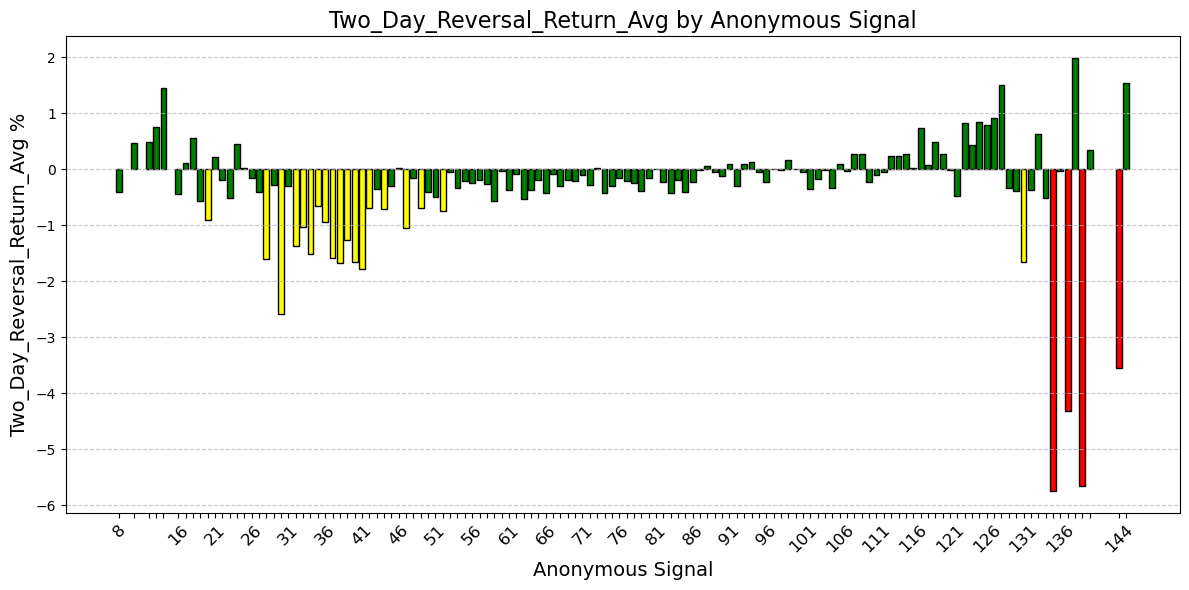

In [340]:
# List of return value columns and their bin equivalents
return_columns = [
    "Reversal_Frequency",
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Define color mapping for bins
bin_colors = {"low": "red", "med": "yellow", "high": "green"}

# Plot each return column with its bins
for return_column in return_columns:
    # Map colors to the bars based on the bin column
    bar_colors = df_combined_avg[f"{return_column}_bin"].map(bin_colors)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_combined_avg["anonymous signal"],
        df_combined_avg[return_column],
        color=bar_colors,
        edgecolor="black"
    )

    # Add title and labels
    plt.title(f"{return_column} by Anonymous Signal", fontsize=16)
    plt.xlabel("Anonymous Signal", fontsize=14)

    return_column_label = f"{return_column} %" if "Return" in return_column else f"{return_column} #"

    plt.ylabel(return_column_label, fontsize=14)

    # Display every 5th signal on the x-axis
    x_positions = df_combined_avg["anonymous signal"]
    x_labels = [label if i % 5 == 0 else "" for i, label in enumerate(x_positions)]
    plt.xticks(df_combined_avg["anonymous signal"], x_labels, rotation=45, fontsize=12)

    # Add grid for better readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()


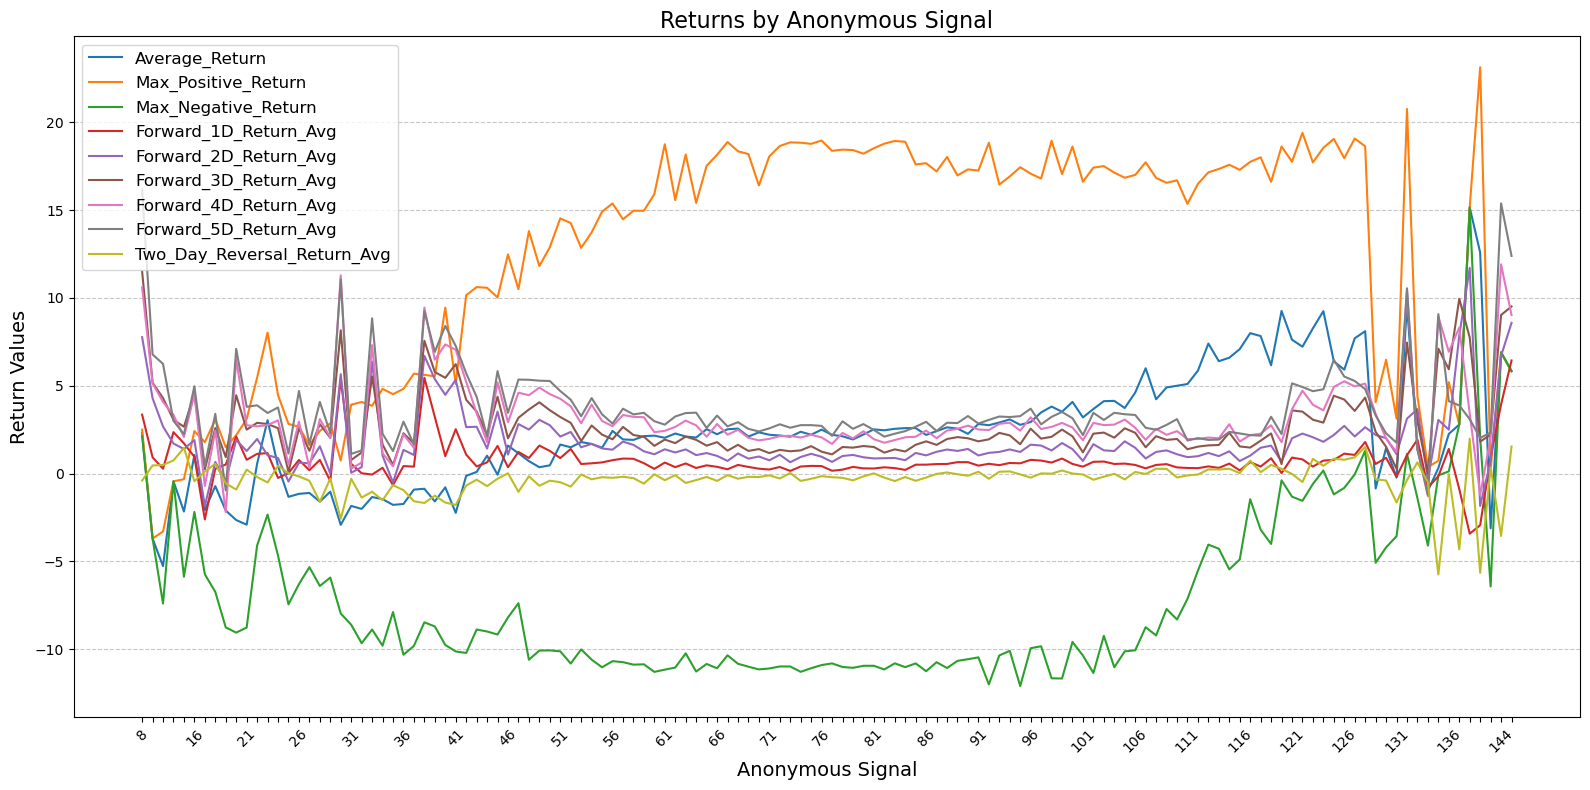

In [341]:
# List of columns to plot
columns_to_plot = [
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Determine x-tick positions to show every 10th signal
x_positions = range(len(df_combined_avg["anonymous signal"]))
x_labels = df_combined_avg["anonymous signal"]
x_ticks_to_display = [x_labels[i] if i % 5 == 0 else "" for i in x_positions]

# Plot each column with a different color
plt.figure(figsize=(16, 8))
for column in columns_to_plot:
    plt.plot(
        x_positions,  # x-axis (use index for spacing)
        df_combined_avg[column],  # y-axis
        label=column  # Label for the legend
    )

# Add title and labels
plt.title("Returns by Anonymous Signal", fontsize=16)
plt.xlabel("Anonymous Signal", fontsize=14)
plt.ylabel("Return Values", fontsize=14)

# Rotate x-axis labels and display only selected ones
plt.xticks(x_positions, x_ticks_to_display, rotation=45, fontsize=10)

# Add a legend to differentiate lines
plt.legend(loc="upper left", fontsize=12)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In the following graphs we will use a hollistic bind color. This bin is a multidimentional clustering of each of the dataframe variables. Taking all of the variables into consideration, create a bin. I find this to most correlate to a signal indicating a "safe" bet on a stock.


In the following graphs, we will use a holistic bin color to represent clusters of stocks based on their multidimensional characteristics. This bin is determined by applying KMeans clustering to all numeric variables in the DataFrame simultaneously. Each stock is assigned to a cluster based on the combined behavior of its variables. These clusters are then labeled as low, med, or high based on their relative positions in the data.

By considering all variables together, the unified bin provides a comprehensive view of each stock’s overall profile. This approach is particularly useful for identifying patterns or signals that correlate with a "safe" bet on a stock, as it captures the combined influence of multiple variables.

In [342]:
# List of columns to cluster (excluding Ticker and non-numeric columns)
columns_to_cluster = [
    "Reversal_Frequency",
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Perform multidimensional clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_combined_avg["Cluster"] = kmeans.fit_predict(df_combined_avg[columns_to_cluster])

# Sort clusters by their centroids (average of all variables in each cluster)
centroids = kmeans.cluster_centers_.mean(axis=1)
sorted_clusters = np.argsort(centroids)

# Define bin labels
cluster_labels = ["low", "med", "high"]
cluster_to_bin = {sorted_clusters[i]: cluster_labels[i] for i in range(len(cluster_labels))}

# Map clusters to unified bin labels
df_combined_avg["Unified_Bin"] = df_combined_avg["Cluster"].map(cluster_to_bin)

# Drop the intermediate Cluster column if not needed
df_combined_avg.drop(columns=["Cluster"], inplace=True)

# View the updated DataFrame
df_combined_avg


,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,...,Average_Return_bin,Max_Positive_Return_bin,Max_Negative_Return_bin,Forward_1D_Return_Avg_bin,Forward_2D_Return_Avg_bin,Forward_3D_Return_Avg_bin,Forward_4D_Return_Avg_bin,Forward_5D_Return_Avg_bin,Two_Day_Reversal_Return_Avg_bin,Unified_Bin
0,8,2.000000,2.315000,2.500000,2.130000,3.355000,7.765000,11.515000,10.600000,16.155000,...,med,low,high,high,high,high,high,high,high,low
1,10,1.000000,-3.696667,-3.696667,-3.696667,0.926667,4.290000,5.176667,5.140000,6.783333,...,low,low,med,med,med,med,med,med,high,low
2,12,2.333333,-5.270556,-3.296667,-7.400000,0.277778,2.676111,4.296667,4.076667,6.242778,...,low,low,med,med,med,med,med,med,high,low
3,13,1.000000,-0.440000,-0.440000,-0.440000,2.360000,1.710000,3.060000,3.340000,3.000000,...,low,low,high,med,low,low,low,low,high,low
4,14,4.000000,-2.160000,-0.320000,-5.870000,1.720000,1.402500,2.667500,2.080000,2.240000,...,low,low,med,med,low,low,low,low,high,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,138,1.000000,15.150000,15.150000,15.150000,-3.420000,11.710000,7.750000,3.410000,3.100000,...,high,high,high,low,high,high,low,low,high,low
128,139,1.000000,12.580000,23.130000,2.030000,-2.940000,-1.840000,1.820000,-1.220000,2.030000,...,high,high,high,low,low,low,low,low,low,low
129,140,2.000000,-3.115000,0.200000,-6.430000,0.935000,0.720000,2.215000,2.050000,2.335000,...,low,low,med,med,low,low,low,low,high,low
130,144,1.000000,6.900000,6.900000,6.900000,3.940000,6.700000,9.030000,11.910000,15.380000,...,high,low,high,high,high,high,high,high,low,low


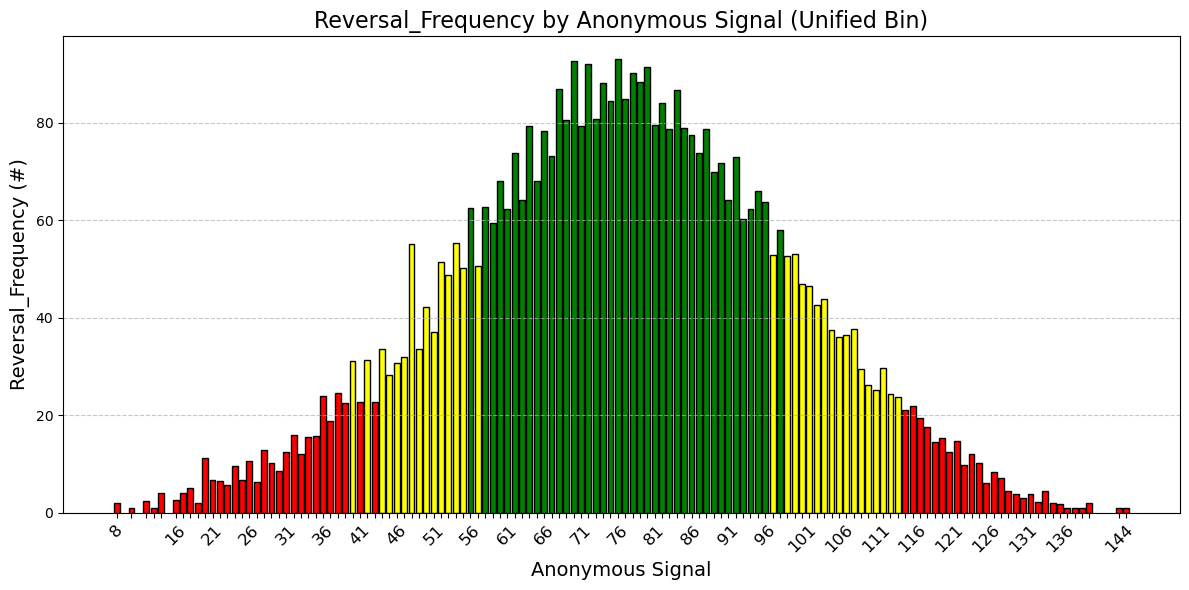

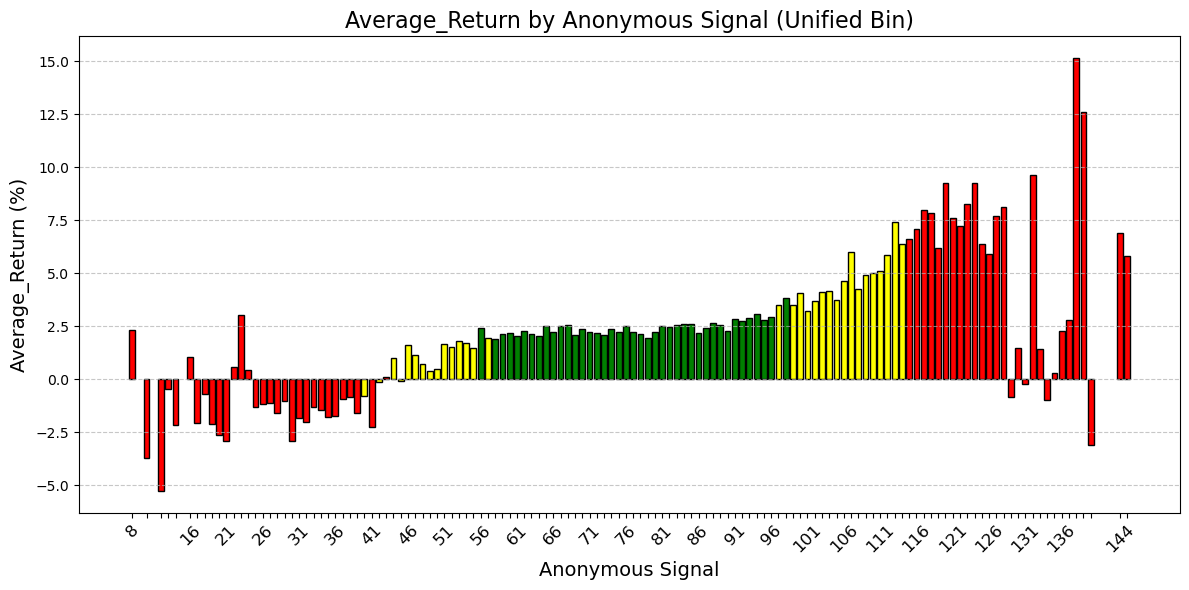

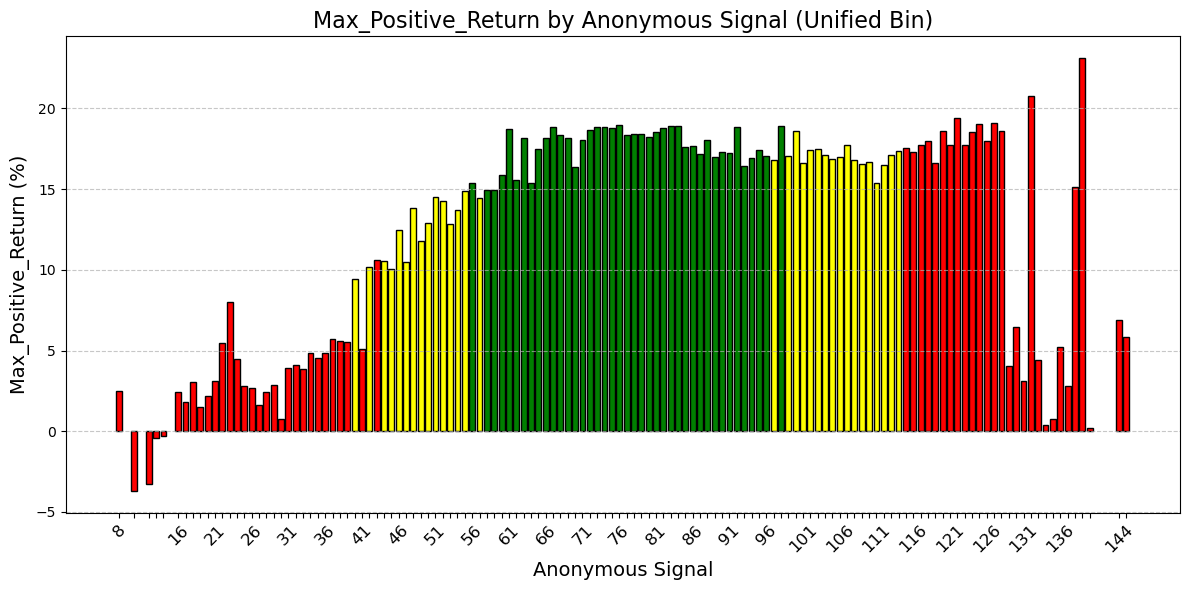

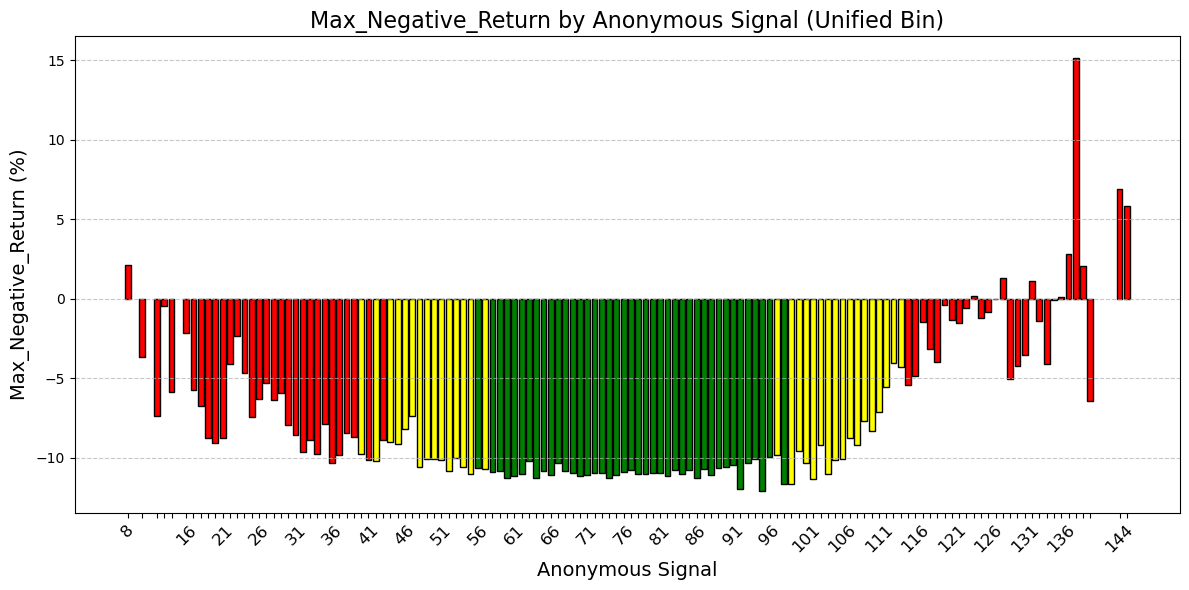

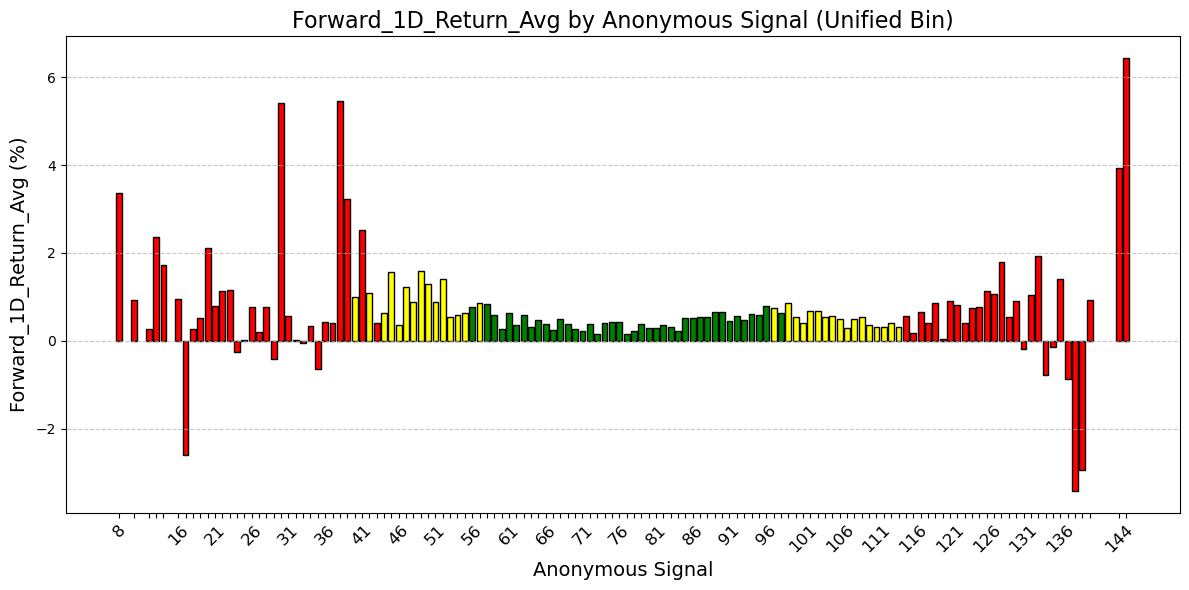

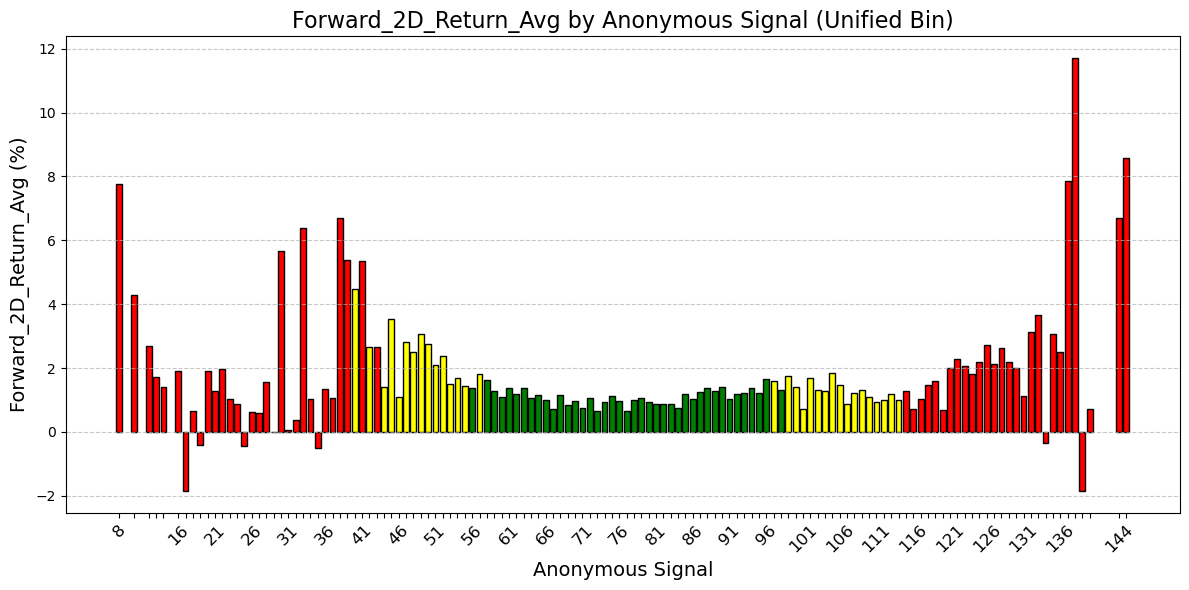

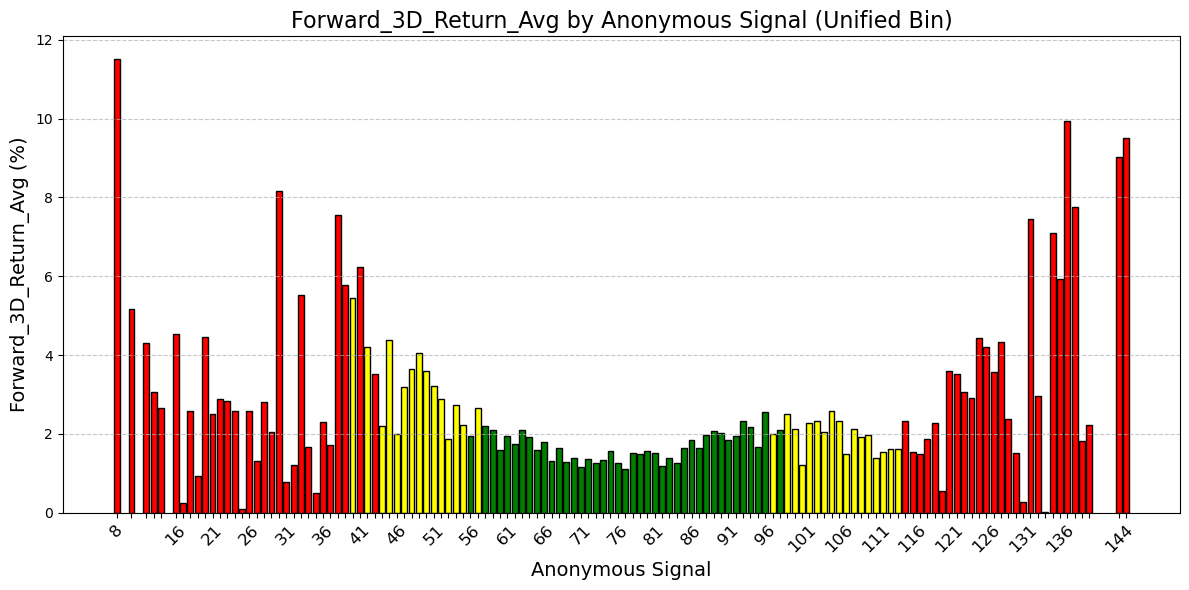

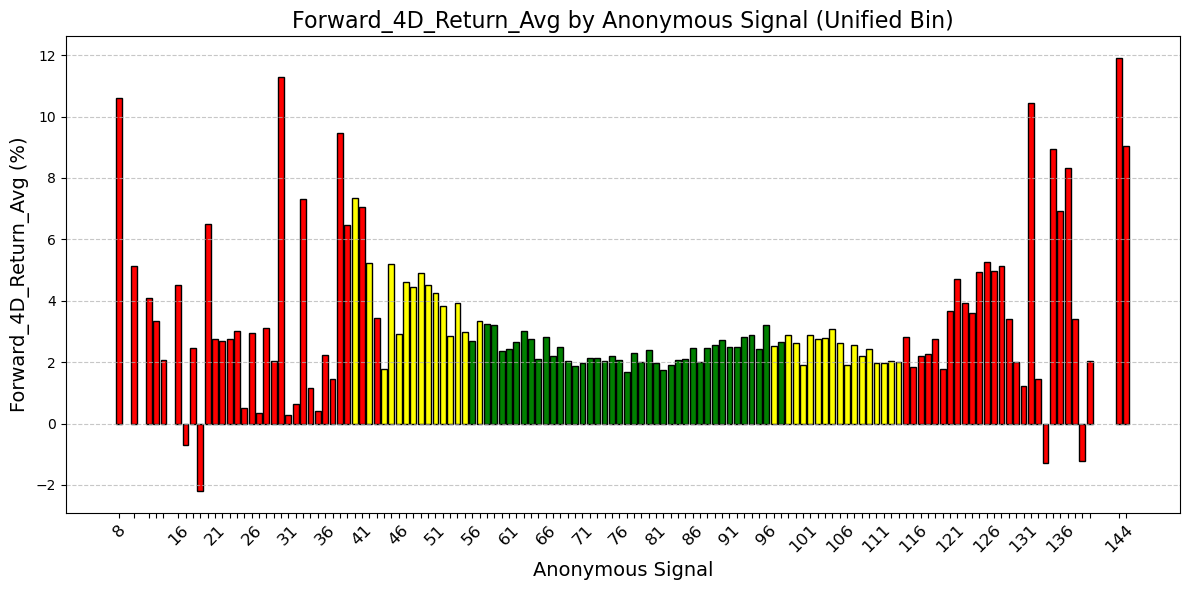

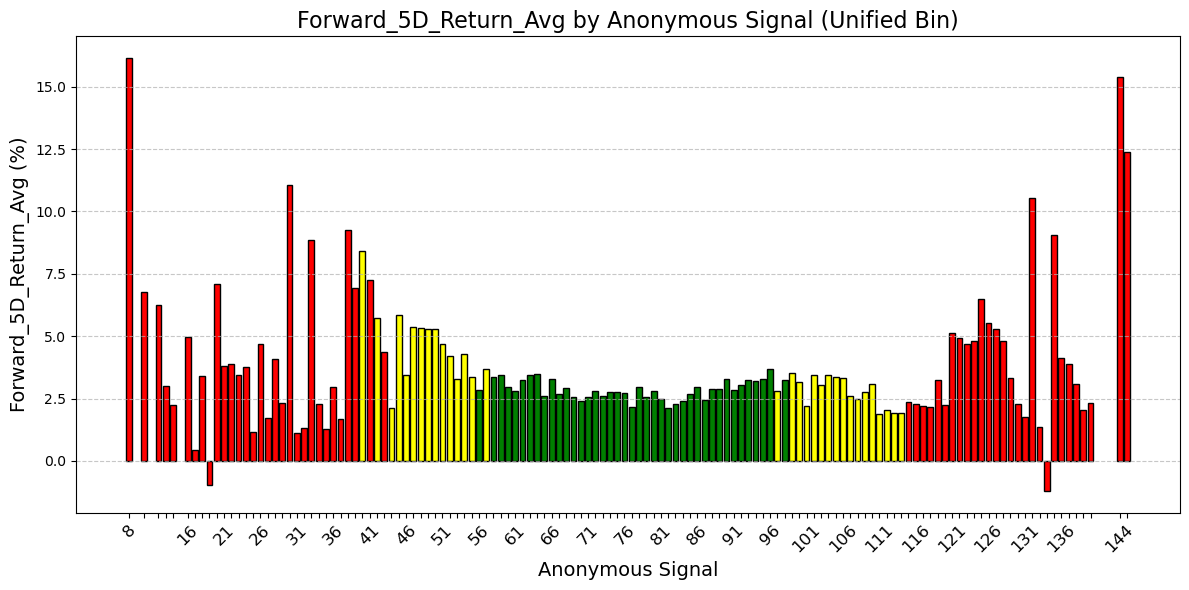

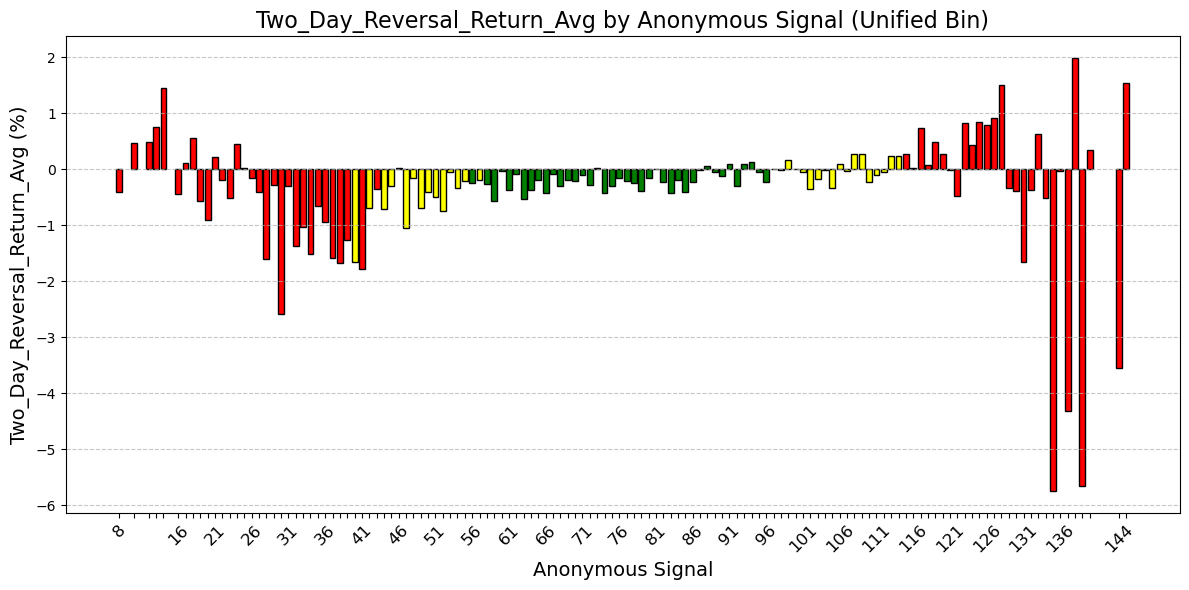

In [343]:
# List of return value columns
return_columns = [
    "Reversal_Frequency",
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Define color mapping for the unified bin
bin_colors = {"low": "red", "med": "yellow", "high": "green"}

# Map colors to the bars based on the Unified_Bin column
bar_colors = df_combined_avg["Unified_Bin"].map(bin_colors)

# Plot each return column with the unified bin coloring
for return_column in return_columns:
    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_combined_avg["anonymous signal"],
        df_combined_avg[return_column],
        color=bar_colors,
        edgecolor="black"
    )

    # Add title and labels
    plt.title(f"{return_column} by Anonymous Signal (Unified Bin)", fontsize=16)
    plt.xlabel("Anonymous Signal", fontsize=14)

    # Dynamically set y-axis label
    return_column_label = f"{return_column} (%)" if "Return" in return_column else f"{return_column} (#)"
    plt.ylabel(return_column_label, fontsize=14)

    # Display every 5th signal on the x-axis
    x_positions = df_combined_avg["anonymous signal"]
    x_labels = [label if i % 5 == 0 else "" for i, label in enumerate(x_positions)]
    plt.xticks(df_combined_avg["anonymous signal"], x_labels, rotation=45, fontsize=12)

    # Add grid for better readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()
